# Network Analysis of Paraguayan Soybean Exporters

### Section 1 - Load Data and Initialize Network

In [10]:
import pandas as pd
import networkx as nx
import community as community_louvain
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load edge list and node attributes
# These files were previously generated from export transaction data
edges_df = pd.read_csv("soybean_coexport_edges.csv")
nodes = pd.read_csv("soybean_export_nodes.csv")

In [14]:
# Initialize undirected graph
# Each edge represents a co-occurrence of two exporters targeting the same destination market in a given year
G = nx.Graph()

# Add edges with attributes
for _, row in edges_df.iterrows():
    G.add_edge(
        row['source'],
        row['target'],
        weight=row['weight'],
        year=row['year'],
        country=row['country']
    )

In [16]:
# Basic overview
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 105
Number of edges: 2019


### Section 2 - Global Network Description

In [19]:
# Compute basic structural metrics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density of the network: {density:.4f}")

Number of nodes: 105
Number of edges: 2019
Density of the network: 0.3698


In [21]:
# Compute average degree (mean number of connections per node)
degrees = [deg for _, deg in G.degree()]
avg_degree = np.mean(degrees)
print(f"Average degree: {avg_degree:.2f}")

Average degree: 38.46


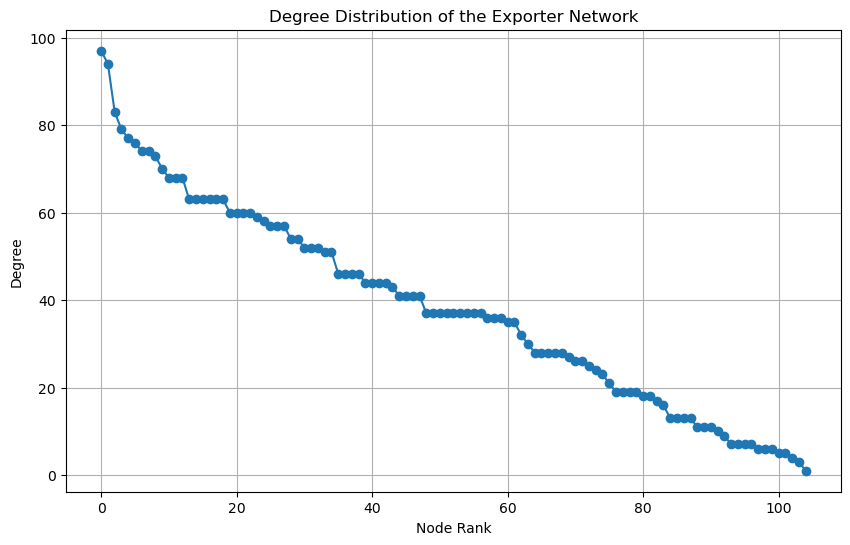

In [23]:
# Plot degree distribution
# This visualizes how connected the nodes are and whether there is a skewed concentration
degree_sequence = sorted(degrees, reverse=True)
plt.figure(figsize=(10, 6))
plt.plot(degree_sequence, marker='o')
plt.title('Degree Distribution of the Exporter Network')
plt.xlabel('Node Rank')
plt.ylabel('Degree')
plt.grid(True)
plt.show()

### Section 3 - Centrality measures

In [32]:
# Compute Degree Centrality
# Indicates how many direct connections each exporter has
degree_centrality = nx.degree_centrality(G)
# Utility function: get top N nodes by centrality score
def top_n_centrality(centrality_dict, n=10):
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return sorted_centrality[:n]

# Top 10 exporters by degree centrality
top_10_degree = top_n_centrality(degree_centrality)
print("Top 10 Exporters by Degree Centrality:")
for i, (firm, score) in enumerate(top_10_degree, 1):
    print(f"{i}. {firm}: {score:.4f}")

Top 10 Exporters by Degree Centrality:
1. CARGILL: 0.9327
2. ADM: 0.9038
3. AGROFERTIL SA: 0.7981
4. AGRO SILO SANTA CATALINA: 0.7596
5. TRANS AGRO SA: 0.7404
6. UNEXPA: 0.7308
7. COFCO: 0.7115
8. OLEAGINOSA RAATZ: 0.7115
9. LOUIS DREYFUS: 0.7019
10. DEKALPAR: 0.6731


In [34]:
# Compute Betweenness Centrality (weighted)
# Measures how often a node lies on the shortest paths between other nodes
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Top 10 exporters by betweenness centrality
top_10_betweenness = top_n_centrality(betweenness_centrality)
print("\nTop 10 Exporters by Betweenness Centrality:")
for i, (firm, score) in enumerate(top_10_betweenness, 1):
    print(f"{i}. {firm}: {score:.6f}")


Top 10 Exporters by Betweenness Centrality:
1. LOUIS DREYFUS: 0.308626
2. HOSTETTLER KOHLI PEDRO: 0.219754
3. AG SEEDS LATIN AMERICA: 0.200336
4. ADM: 0.188200
5. DE GOES ADALCIR: 0.152913
6. CONTIPARAGUAY: 0.148992
7. NUTREX PARAGUAY: 0.142644
8. BUNGE: 0.104182
9. ECOTRADING YVA: 0.103996
10. SURAGRO: 0.076923


In [36]:
# Compute Eigenvector Centrality (weighted)
# Identifies exporters connected to other well-connected exporters
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight', max_iter=500)

# Top 10 exporters by eigenvector centrality
top_10_eigenvector = top_n_centrality(eigenvector_centrality)
print("\nTop 10 Exporters by Eigenvector Centrality:")
for i, (firm, score) in enumerate(top_10_eigenvector, 1):
    print(f"{i}. {firm}: {score:.6f}")


Top 10 Exporters by Eigenvector Centrality:
1. VICENTIN PARAGUAY: 0.439879
2. COFCO: 0.360375
3. CARGILL: 0.297122
4. FRANCISCO VIERCI Y CIA: 0.285733
5. SODRUGESTVO: 0.273917
6. SALTO AGUARAY: 0.266618
7. COMPANIA DE AGROQUIMICOS DEL PARAGUAY (CIAGROPA): 0.223409
8. LONDRINA: 0.211217
9. CHS: 0.206732
10. AGROFERTIL SA: 0.175017


In [38]:
# Compute Closeness Centrality
# Reflects how close a node is to all other nodes in the network
closeness_centrality = nx.closeness_centrality(G)

# Top 10 exporters by closeness centrality
top_10_closeness = top_n_centrality(closeness_centrality)
print("\nTop 10 Exporters by Closeness Centrality:")
for i, (firm, score) in enumerate(top_10_closeness, 1):
    print(f"{i}. {firm}: {score:.6f}")


Top 10 Exporters by Closeness Centrality:
1. CARGILL: 0.936937
2. ADM: 0.912281
3. AGROFERTIL SA: 0.825397
4. AGRO SILO SANTA CATALINA: 0.800000
5. TRANS AGRO SA: 0.793893
6. UNEXPA: 0.781955
7. COFCO: 0.776119
8. LOUIS DREYFUS: 0.770370
9. OLEAGINOSA RAATZ: 0.770370
10. DEKALPAR: 0.748201


### Section 4 - Community Detection (Louvain Method)

In [41]:
# 4. Detección de comunidades con algoritmo de Louvain
partition = community_louvain.best_partition(G, weight='weight')

In [43]:
# Apply Louvain modularity-based community detection
# This method identifies groups of exporters that are more densely connected internally
partition = community_louvain.best_partition(G, weight='weight')

In [45]:
# Convert partition dictionary to DataFrame
df_louvain = pd.DataFrame.from_dict(partition, orient='index', columns=['louvain_community']).reset_index()
df_louvain.rename(columns={'index': 'Id'}, inplace=True)

# Standardize exporter identifiers
df_louvain['Id'] = df_louvain['Id'].str.strip().str.upper()

In [47]:
# Number of communities detected
num_communities = df_louvain['louvain_community'].nunique()
print(f"Number of Louvain communities detected: {num_communities}")

Number of Louvain communities detected: 4


In [49]:
# Display members of each community
for c in sorted(df_louvain['louvain_community'].unique()):
    print(f"\nCommunity {c}:")
    print(df_louvain[df_louvain['louvain_community'] == c]['Id'].tolist())


Community 0:
['ADM', 'BUNGE', 'LOUIS DREYFUS', 'MSU AGROPY', 'COOPERATIVA NARANJITO', 'COMPLEJO AGRO INDUSTRIAL ANGOSTURA (CAIASA)', 'COOPERATIVA YGUAZU', 'GL SOUTH AMERICA', 'FARGO EXPORT', 'NEGOCIOS DEL AGRO PARAGUAY', 'THE GRAIN LEADER PARAGUAY', 'TRANSAGRO', 'ANDRADA PASMOR AGUSTIN ROBERTO MARIA', 'NUTREX PARAGUAY', 'VINI', 'RELMO PARAGUAY', 'ARAGUANEY', 'MERCO RICE', 'VILLA CAMPO', 'ALAGRO', 'BASF', 'SYNGENTA']

Community 1:
['CONTIPARAGUAY', 'ACTIVA', 'AGRICOLA COLONIAL INDUSTRIAL Y COMERCIAL', 'AGRICOLA SANTA FE', 'AGRITRADE', 'AGRO SILOS EL PRODUCTOR', 'AGRO SOJA', 'AGROFERTIL SA', 'AGROSER AGROINDUSTRIAL E COMERCIAL SERTANEJA LTDA', 'AGROTEC', 'ALLEGRETTI', 'C. VALE', 'COOPERATIVA COLONIAS UNIDAS', 'COOPERATIVA NARANJAL (COPRONAR)', 'COOPERATIVA PINDO', 'COOPERATIVA SANTA MARIA (COOPASAM)', 'CRAP', 'DE SOUZA RENILSON MAIA', 'DIAGRO', 'EMPRESA DE TRANSPORTE SAN CRISTOBAL', 'GRUPO APANE', 'HOLTKER BEATE VERONIKA', 'HOSTETTLER KOHLI PEDRO', 'INVERSIONES AGRICOLA', 'JR PAR IMPORT

### Section 5 - Attributes analysis

In [54]:
# Load node-level economic attributes
df_attrs = pd.read_csv("soybean_export_nodes.csv")
print(df_attrs.columns)

Index(['Id', 'total_fob_value', 'total_volume', 'total_land_use',
       'transnational'],
      dtype='object')


In [56]:
# Drop previous Louvain community column if it exists (to avoid duplication)
df_attrs = df_attrs.drop(columns=['louvain_community'], errors='ignore')

In [58]:
# Merge Louvain communities into attribute table
df_merged = df_attrs.merge(df_louvain, on="Id", how="left")
print(df_merged.columns)

Index(['Id', 'total_fob_value', 'total_volume', 'total_land_use',
       'transnational', 'louvain_community'],
      dtype='object')


In [60]:
# Descriptive statistics by Louvain community
group_stats = df_merged.groupby('louvain_community').agg(
    num_enterprises = ('Id', 'count'),
    avg_fob_value = ('total_fob_value', 'mean'),
    median_fob_value = ('total_fob_value', 'median'),
    total_fob_value = ('total_fob_value', 'sum'),
    avg_land_use = ('total_land_use', 'mean'),
    median_land_use = ('total_land_use', 'median'),
    total_land_use = ('total_land_use', 'sum')
).reset_index().sort_values(by='total_fob_value', ascending=False)

# Configure display: suppress scientific notation and show thousand separators
pd.options.display.float_format = '{:,.0f}'.format

display(group_stats)

,louvain_community,num_enterprises,avg_fob_value,median_fob_value,total_fob_value,avg_land_use,median_land_use,total_land_use
2,2,23,"402,182,113","35,325,419","9,250,188,598","357,996","33,479","8,233,916"
0,0,22,"317,779,289","1,560,294","6,991,144,355","276,373","1,250","6,080,206"
3,3,3,"574,230,968","87,905,630","1,722,692,903","590,678","66,473","1,772,034"
1,1,57,"21,202,556","3,343,290","1,208,545,684","20,605","2,506","1,174,489"


In [62]:
# Restore default pandas float display format
pd.reset_option('display.float_format')

In [64]:
# Count transnational firms by Louvain community
trans_counts = df_merged.groupby(['louvain_community', 'transnational']).agg(
    num_enterprises = ('Id', 'count')
).reset_index()

# Pivot table: community × transnational status
trans_pivot = trans_counts.pivot(index='louvain_community', columns='transnational', values='num_enterprises').fillna(0)

# Add total and proportion of transnational firms per community
trans_pivot['total'] = trans_pivot.sum(axis=1)
trans_pivot['prop_transnational'] = trans_pivot.get('Oui', 0) / trans_pivot['total']

display(trans_pivot)

transnational,No,Yes,total,prop_transnational
louvain_community,,,,
0.0,16.0,6.0,22.0,0.0
1.0,57.0,0.0,57.0,0.0
2.0,17.0,6.0,23.0,0.0
3.0,2.0,1.0,3.0,0.0


In [66]:
# Compute modularity score
modularity_value = community_louvain.modularity(partition, G, weight='weight')
print(f"Modularity: {modularity_value:.4f}")

Modularity: 0.2542


In [72]:
# Compute PageRank
pagerank_dict = nx.pagerank(G, weight='weight')
# Convert to DataFrame
df_pagerank = pd.DataFrame.from_dict(pagerank_dict, orient='index', columns=['pagerank']).reset_index()
df_pagerank.rename(columns={'index': 'Id'}, inplace=True)

# Merge PageRank scores into node-level dataset
df_merged = df_merged.merge(df_pagerank, on='Id', how='left')

### Section 6 - Quick Visualization and Export for Gephi

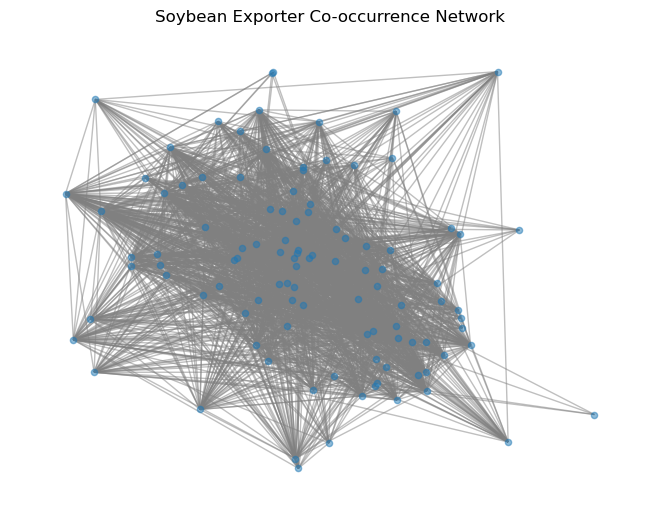

In [75]:
# Basic graph visualization (optional, not suitable for large graphs)
nx.draw(G, node_size=20, edge_color='gray', alpha=0.5)
plt.title("Soybean Exporter Co-occurrence Network")
plt.show()

In [77]:
# Select key node attributes for export to Gephi
nodes_gephi = df_merged[[
    'Id',
    'transnational',
    'total_fob_value',
    'total_land_use',
    'louvain_community',
    'pagerank'
]]

# Export node attributes to CSV for network analysis in Gephi
nodes_gephi.to_csv("nodes_gephi_soja.csv", index=False)